<a href="https://colab.research.google.com/github/Rohan-Dawar/ML-Wine-Price-Prediction/blob/main/Machine_Learning_Models_Predicting_Wine_Prices_Rohan_Dawar6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('machine-learning-models-predicting-wine-prices-rohan-dawar5')
jovian.set_colab_id('11Hs4QayNa5xAGpHNYLua_HaHM38KH93O')

     |████████████████████████████████| 68 kB 2.7 MB/s 


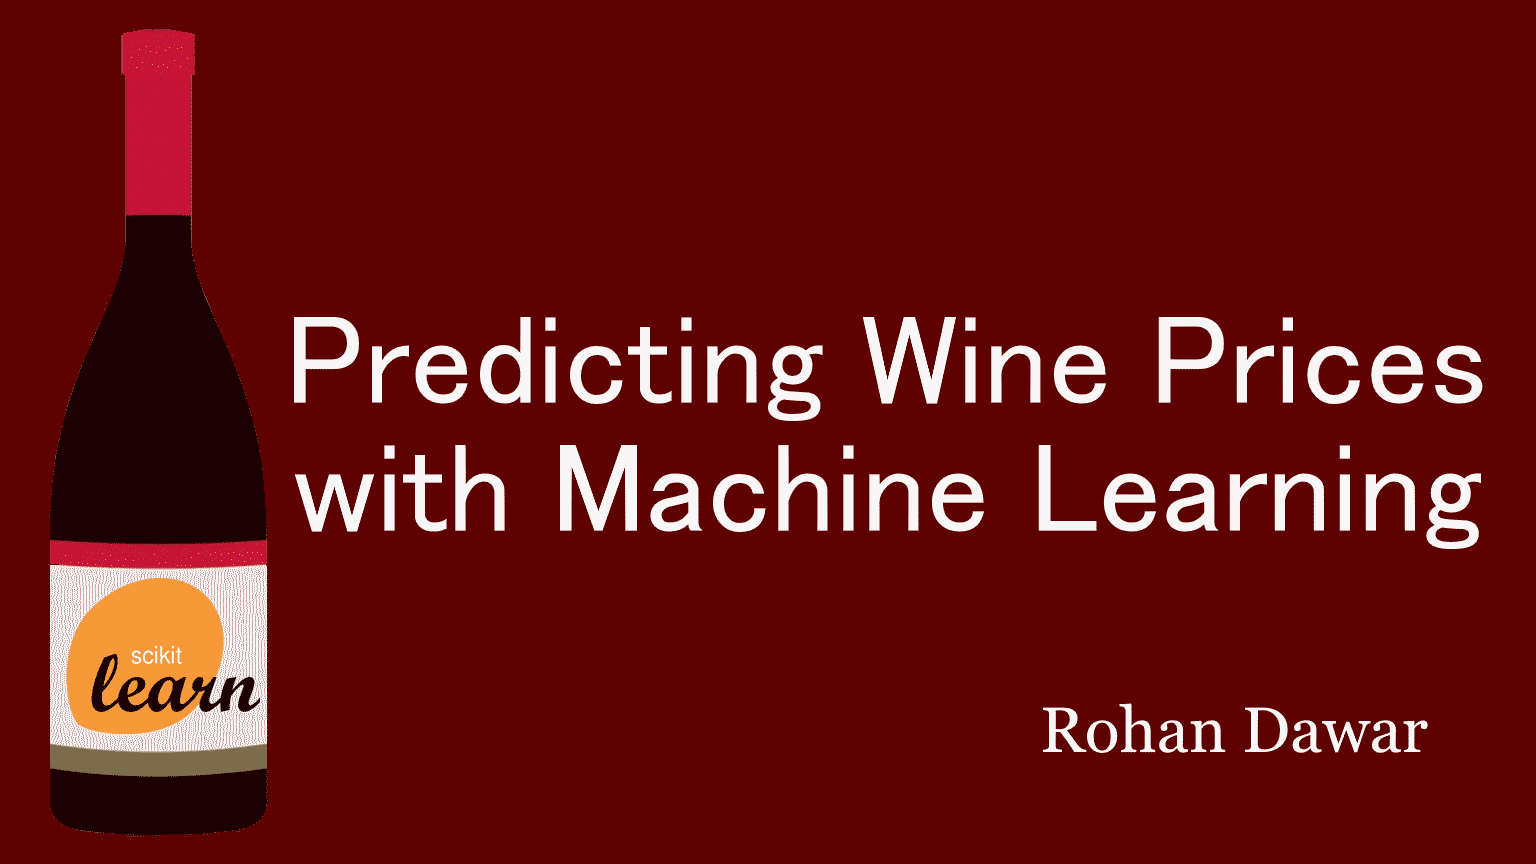

# Predicting Wine Prices with Machine Learning


*   In this project, I will be building a Machine Learning model to predict the price of wine (bottle) based on this [wine reviews kaggle dataset](https://www.kaggle.com/zynicide/wine-reviews), which itself is scraped from [WineEnthusiast](https://www.winemag.com/)


---

### Author: Rohan Dawar

### dawar.rohan1@gmail.com

### [Website](https://www.rohandawar.com)

### [Github](https://github.com/Rohan-Dawar/)

### [Jovian](https://jovian.ai/rohan-dawar)

### [LinkedIn](https://www.linkedin.com/in/rohan-dawar/)


# **Outline**

## 1. [Downloading The Dataset, OpenDatasets](#1)

## 2. [Data Cleaning](#2)

## 3. [Creating Word Columns](#3)

## 4. [Scaling](#4)

## 5. [Mean Target Encoding](#4a)

## 6. [Identifying Inputs & Targets](#5)

## 7. [Encoding](#6)

## 8. [Data Analysis](#7)

## 9. [Train Test Val Split](#8)

## 10. [Baseline Models](#9)

## 11. [Ridge Regression](#10)

## 12. [Ridge Regression Log](#11)

## 13. [Lasso Regression](#12)

## 14. [Lasso Regression Log](#13)

## 15. [Decision Tree Regression](#14)

## 16. [Decision Tree Regression Log](#15)

## 17. [Random Forest](#16)

## 18. [Random Forest Log](#17)

## 19. [Gradient Boosting](#18)

## 20. [Gradient Boosting Log](#19)

## 21. [K-Fold Cross Validation](#20)

## 22. [Hyperparameter Tuning](#21)

## 23. [Saving Performance Sheet, DataFrame & Models](#22)

## 24. [Specific Model Predictions](#23)

## 25. [Conclusion](#24)

## 26. [Sources & References](#25)

## 27. [Future Work](#26)

---

# Downloading the Dataset, OpenDatasets

<a name='1' id='1'></a>



In [2]:
# Install Dependencies
!pip install opendatasets --quiet

In [3]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/zynicide/wine-reviews/'

In [5]:
# Provide your Kaggle Username and API Key:

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohanmdawar
Your Kaggle Key: ··········


100%|██████████| 50.9M/50.9M [00:00<00:00, 114MB/s]


In [6]:
# Read dataset into pandas dataframe
# If not using Google Colab, you may need to change the URL path to the csv
import pandas as pd
df = pd.read_csv('/content/wine-reviews/winemag-data_first150k.csv')

---

# Data Cleaning

<a name='2' id='2'></a>

##### In this section I drop all rows without price and fill the rows without country data from the country of the same winery, lastly I drop Unnamed column

In [7]:
# Drop rows without price
dfP = df[df['price'].notnull()]
len(dfP)

137235

In [8]:
# Fill geodata from those with same winery
for i in dfP[dfP['country'].isnull()].index:
  row = dfP.loc[i]
  wineryDF = dfP[dfP['winery'] == row['winery']]
  try:
    country = wineryDF['country'].dropna().unique()[0]
    province = wineryDF['province'].dropna().unique()[0]
    region_1 = wineryDF['country'].unique()[0]
    region_2 = wineryDF['country'].unique()[0]

    dfP.at[i, 'country'] = country
    dfP.at[i, 'province'] = province
    dfP.at[i, 'region_1'] = region_1
    dfP.at[i, 'region_2'] = region_2
  except (TypeError, IndexError):
    pass

In [9]:
# Check if any null countries
dfP[dfP['country'].isnull()]

Unnamed: 0 country                                        description  \
1440        1440     NaN  A blend of 60% Syrah, 30% Cabernet Sauvignon a...   

     designation  points  price province region_1 region_2    variety  \
1440        Shah      90   30.0      NaN      NaN      NaN  Red Blend   

         winery  
1440  Büyülübağ

In [10]:
# Fill Turkey
dfP.at[1440, 'country'] = 'Turkey'

In [11]:
# Drop useless columns
if 'Unnamed: 0' in dfP.columns:
  dfP = dfP.drop(columns=['Unnamed: 0'])

In [12]:
# Check Data types
dfP.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [13]:
# Data Preview:
dfP

country                                        description  \
0           US  This tremendous 100% varietal wine hails from ...   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           US  Mac Watson honors the memory of a wine once ma...   
3           US  This spent 20 months in 30% new French oak, an...   
4       France  This is the top wine from La Bégude, named aft...   
...        ...                                                ...   
150925   Italy  Many people feel Fiano represents southern Ita...   
150926  France  Offers an intriguing nose with ginger, lime an...   
150927   Italy  This classic example comes from a cru vineyard...   
150928  France  A perfect salmon shade, with scents of peaches...   
150929   Italy  More Pinot Grigios should taste like this. A r...   

                                 designation  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                 La Brûlade      95   66.0   
...                                      ...     ...    ...   
150925                                   NaN      91   20.0   
150926                        Cuvée Prestige      91   27.0   
150927                         Terre di Dora      91   20.0   
150928                       Grand Brut Rosé      90   52.0   
150929                                   NaN      90   15.0   

                  province           region_1           region_2  \
0               California        Napa Valley               Napa   
1           Northern Spain               Toro                NaN   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4                 Provence             Bandol                NaN   
...                    ...                ...                ...   
150925      Southern Italy  Fiano di Avellino                NaN   
150926           Champagne          Champagne                NaN   
150927      Southern Italy  Fiano di Avellino                NaN   
150928           Champagne          Champagne                NaN   
150929  Northeastern Italy         Alto Adige                NaN   

                   variety                   winery  
0       Cabernet Sauvignon                    Heitz  
1            Tinta de Toro  Bodega Carmen Rodríguez  
2          Sauvignon Blanc                 Macauley  
3               Pinot Noir                    Ponzi  
4       Provence red blend     Domaine de la Bégude  
...                    ...                      ...  
150925         White Blend    Feudi di San Gregorio  
150926     Champagne Blend                H.Germain  
150927         White Blend                Terredora  
150928     Champagne Blend                   Gosset  
150929        Pinot Grigio            Alois Lageder  

[137235 rows x 10 columns]

---

# Creating Word Columns

<a name='3' id='3'></a>

##### Using the description column, we can count the most common words, and use those to create new columns if the description contains those words

In [14]:
from collections import Counter

In [15]:
dfP['description'] = dfP['description'].astype(str)

In [16]:
c = Counter(" ".join(dfP["description"]).split()).most_common(500)
c

[('and', 374829),
 ('the', 186634),
 ('a', 169783),
 ('of', 168535),
 ('with', 135402),
 ('is', 98393),
 ('in', 66676),
 ('this', 65488),
 ('to', 58673),
 ('wine', 52317),
 ('The', 49669),
 ('flavors', 43816),
 ('but', 41564),
 ('on', 40780),
 ('that', 39288),
 ('it', 36877),
 ('This', 34129),
 ('fruit', 32623),
 ('A', 27056),
 ('for', 26895),
 ('aromas', 24901),
 ('are', 24749),
 ('from', 24137),
 ('by', 23564),
 ('has', 23281),
 ("It's", 22635),
 ('black', 21398),
 ('finish.', 19490),
 ('cherry', 18866),
 ('It', 18738),
 ('flavors.', 18533),
 ('palate', 18197),
 ('as', 18197),
 ('its', 18116),
 ('an', 17402),
 ('ripe', 16527),
 ('tannins', 16025),
 ('red', 15925),
 ("it's", 15073),
 ('acidity', 15028),
 ('Drink', 14254),
 ('sweet', 13368),
 ('notes', 13334),
 ('wine,', 12505),
 ('some', 12397),
 ('good', 12333),
 ('spice', 12268),
 ('rich', 12116),
 ('finish', 12061),
 ('berry', 11861),
 ('or', 11837),
 ('very', 11546),
 ('shows', 11325),
 ('more', 11204),
 ('blend', 10966),
 ('at', 

### Manual Wordcloud:

In [17]:
# Adjectives, descriptors or aroma notes from the above counter:
wordcloud = [
             'fruit',
             'flavors',
             'aromas',
             'black',
             'finish',
             'cherry',
             'ripe',
             'palate',
             'tannins',
             'red',
             'acidity',
             'sweet',
             'notes',
             'spice',
             'rich',
             'berry',
             'blend',
             'dry',
             'white',
             'oak',
             'soft',
             'plum',
             'green',
             'crisp',
             'vanilla',
             'blackberry',
             'nose',
             'citrus',
             'apple',
             'bright',
             'chocolate',
             'raspberry',
             'light',
             'full',
             'firm',
             'spicy',
             'dried',
             'balanced',
             'peach',
             'rich',
             'pepper',
             'herbal',
             'mineral',
             'smooth',
             'hint',
             'creamy',
             'tannic',
             'pear',
             #'imported',
             'wood',
             'lemon',
             'structure',
             'clean',
             'mouth',
             'smoky',
             'mouthfeel',
             'elegant',
             'tart',
             'sweet',
             'cherries',
             'pretty',
             'complex',
             'toast',
             #'open',
             'nice',
             'character',
             'currant',
             'wild',
             'plenty',
             'balance',
             'orange',
             'tropical',
             'cassis',
             'easy',
             'showing',
             'concentrated']

In [18]:
# most common descriptive words:
mostCommonDesciptors = {x:dict(c)[x] for x in wordcloud}
worddf = pd.DataFrame(mostCommonDesciptors, index=[0]).T.reset_index().rename(columns={'index':'word',0:'count'}).sort_values(by='count', ascending=False)
worddf

word  count
1        flavors  43816
0          fruit  32623
2         aromas  24901
3          black  21398
5         cherry  18866
..           ...    ...
63          wild   3492
69          easy   3426
70       showing   3276
71  concentrated   3177
56      cherries   2712

[72 rows x 2 columns]

In [19]:
import plotly.express as px

In [20]:
# Plotting the 15 most common descriptive words:
fig = px.bar(worddf.head(15), x='count', y='word', orientation='h', text='count', title='Most Common Descriptive Words', color_discrete_sequence=['darkred'])
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Word')

#### Interesting to note that the word **flavors** appears so many times throughout the dataset. Given the relative neutrality of this word (as opposed to words like **fruit**, **cherry**, or **spice**), I suspect it will not have too great an impact on our models.

In [21]:
import numpy as np

In [22]:
# Creating WORD columns, 1 if word appears in description, 0 if not
for word in wordcloud:
  colname = f'WORD: {word}'
  dfP[colname] = np.where(dfP['description'].str.contains(word, case=False, na=False), 1, 0)

---

# Scaling

<a name='4' id='4'></a>

In [23]:
# All Points Are in Range [80,100], so we can scale them to range [0,1]

dfP['points'].describe()

count    137235.000000
mean         87.787919
std           3.221680
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [24]:
def PointsToPCT(point):
  return (point-80)/20

In [25]:
dfP['points'] = dfP['points'].apply(PointsToPCT)

In [26]:
dfP['points'].describe()

count    137235.000000
mean          0.389396
std           0.161084
min           0.000000
25%           0.300000
50%           0.400000
75%           0.500000
max           1.000000
Name: points, dtype: float64

---

# Mean Target Encoding

<a name='4a' id='4a'></a>

##### MTE involves calculating the mean value of the target column for each unique value of the encoded column. It provides estimated target values for all unique values within the encoded column, and uses the universal target mean or a target mean for a broader column when a new value appears that does not appear in the training set.

In [27]:
dfP['region_1'].nunique()

1198

In [28]:
dfP['region_2'].nunique()

19

In [29]:
dfP['winery'].nunique()

13852

In [30]:
dfP['designation'].nunique()

28346

In [31]:
def MeanTargetEncode(x, col):
  meanVal = dfP[dfP[col]==x]['price'].mean()
  return meanVal

In [32]:
# List of columns to mean target encode, these are the columns that either have too many unique values or are too sparse to one-hot encode
MTEcols = ['region_1', 'region_2', 'winery', 'designation']

In [33]:
# Mean Target Encode All Columns:
for c in MTEcols:
  newcol = f'MTE: {c}'
  dfP[newcol] = dfP[c].apply(lambda x : MeanTargetEncode(x, c))
  print(f"Mean Target Encoded {c}")

Mean Target Encoded region_1
Mean Target Encoded region_2
Mean Target Encoded winery
Mean Target Encoded designation


In [34]:
# Fill all NaN MTE Cols with the MTE of Country Col
for col in dfP.filter(like='MTE: ').columns:
  nans = dfP[dfP[col].isnull()]
  nans[col] = nans['country'].apply(lambda x : MeanTargetEncode(x, 'country'))
  dfP[col].fillna(nans[col], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
# There are no NaN values for Mean Target Encoded Cols:
dfP.filter(like='MTE: ').isnull().sum()

MTE: region_1       0
MTE: region_2       0
MTE: winery         0
MTE: designation    0
dtype: int64

In [36]:
def groupbyMTE(col):
  mtecol = f'MTE: {col}'
  gbdf = dfP.groupby([col, 'country', mtecol]).count().reset_index()[[col, 'country', mtecol]].sort_values(by=mtecol, ascending=False).reset_index(drop=True)
  return gbdf

In [37]:
# MTEs for Region 1
gbRegion1 = groupbyMTE('region_1')
gbRegion1.to_csv('MTE_region1.csv')
gbRegion1

region_1    country  MTE: region_1
0                         Montrachet     France     601.181818
1                 Romanée-St.-Vivant     France     545.000000
2               Mazoyeres-Chambertin     France     475.000000
3               Chevalier-Montrachet     France     438.263158
4                   Grands-Echezeaux     France     391.000000
...                              ...        ...            ...
1193       Riviera Ligure di Ponente      Italy       8.333333
1194  Vin de Pays de l'Ile de Beauté     France       8.000000
1195           Australia-New Zealand  Australia       8.000000
1196                            Gers     France       7.000000
1197                            Cuyo  Argentina       5.000000

[1198 rows x 3 columns]

In [38]:
import plotly.express as px

In [39]:
def PlotTopBottom(df, t, yaxisname, legendx=.4):
  top = df.head(10)
  top['isTop'] = 1
  bot = df.tail(10)
  bot['isTop'] = 0
  series = top.append(bot)
  namcol = series.select_dtypes('object').columns[0]
  valcol = series.select_dtypes('float64').columns[0]
  vcround = series.select_dtypes('float64').apply(lambda x : round(x, 2)).values.tolist()
  fig = px.bar(series, x=valcol, y=namcol,  orientation='h', title=t, text=vcround, color='country')
  fig.update_layout(yaxis={'categoryorder':'total ascending'}, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=legendx))
  fig.update_xaxes(title='Mean Target Value ($)')
  fig.update_yaxes(title=yaxisname)
  fig.update_coloraxes
  return fig

In [40]:
PlotTopBottom(gbRegion1, 'Top and Bottom 10 Mean Target Values for Region 1', 'Region 1', legendx=0.53)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Notable that all the top 10 MTE values for Region 1 are in France, with the region of **Montrachet** commanding the highest average price in our dataset.

In [41]:
# MTEs for region 2
groupbyMTE('region_2').to_csv('MTE_region2.csv')
groupbyMTE('region_2')

region_2 country  MTE: region_2
0                      Napa      US      54.140807
1               South Coast      US      37.065657
2         Willamette Valley      US      36.677827
3                    Sonoma      US      36.276440
4               Napa-Sonoma      US      35.769324
5             Central Coast      US      31.708709
6           Columbia Valley      US      29.705785
7   Mendocino/Lake Counties      US      29.326069
8              Oregon Other      US      28.060698
9               North Coast      US      26.893819
10          Southern Oregon      US      25.706505
11         Sierra Foothills      US      24.700422
12         Washington Other      US      24.591216
13              Long Island      US      24.322876
14             Finger Lakes      US      19.231537
15           Central Valley      US      18.294860
16           New York Other      US      18.183673
17                    Chile   Chile      15.000000
18         California Other      US      14.980933

In [42]:
# MTEs for Winery:
groupbyMTE('winery').to_csv('MTE_winery.csv')
PlotTopBottom(groupbyMTE('winery'), 'Top and Bottom 10 Mean Target Values for Winery', 'Winery', legendx=0.53)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### We can see the **Blair** winery in the US commands a high mean target value, with most of the top 10 MTE values for wineries coming from France.

#### Interesting also to note that **Terrenal** appears to be the name of a winery in Spain, Argentina and Chile.

In [43]:
# MTEs for Designation:
groupbyMTE('designation').to_csv('MTE_designation.csv')
PlotTopBottom(groupbyMTE('designation'), 'Top and Bottom 10 Mean Target Values for Designation', 'Designation', legendx=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### We can see the designation of **Clos du Mesnil** from France commands the highest average price within our dataset, with a healthy variety of different countries appearing in the top 10 mean target values for designation.

In [44]:
# Mean Prices of Countries:
countryMeans = dfP.groupby('country')['price'].mean().sort_values(ascending=False)
countryMeans.to_csv('MTE_country.csv')
countryMeans

country
US-France                 50.000000
England                   47.500000
France                    45.619885
Hungary                   44.204348
Luxembourg                40.666667
Germany                   39.011078
Italy                     37.547913
Canada                    34.628866
US                        33.653808
Israel                    31.304918
Australia                 31.258480
Austria                   31.192106
Mexico                    29.095238
Slovenia                  28.061728
Spain                     27.048529
Switzerland               26.500000
Portugal                  26.332615
Turkey                    25.882353
Uruguay                   25.847059
Lebanon                   25.432432
Serbia                    24.285714
New Zealand               24.173290
Japan                     24.000000
Croatia                   23.108434
Greece                    21.742268
South Africa              21.130532
Argentina                 20.794881
China               

#### We can see that US-France, England and France have the highest mean price values in the dataset, while Lithuania and Montenegro have the lowest.


#### If using this model on new data, you must first apply the MTE values for region_1, winery and designation. If the values do not appear in these hashmaps, then apply the country's mean target encoded value from the hashmap above. If the country is not present in this list, then apply either the mean value (33) or median value (24).

---

# Identifying Inputs & Targets

<a name='5' id='5'></a>


In [45]:
# Manual CSV Upload:
# change manualUplaod to True if uploading the CSV of dfP manually :

manualUpload = False

import pandas as pd

if manualUpload:
  dfP = pd.read_csv('/content/dfP.csv').drop(columns=['Unnamed: 0'])
  dfP

In [46]:
# Input Columns:
input_cols = list(dfP.columns)

In [47]:
def remove_from_inputs(listOfIN):
  for input in listOfIN:
    if input in input_cols:
      input_cols.remove(input)

In [48]:
# List Of Columns to remove from inputs:
removeL = ['price', 'region_1', 'region_2', 'winery', 'description', 'designation']
remove_from_inputs(removeL)
inputs_df = dfP[input_cols].copy()

In [49]:
# Target Column = Price
target_col = 'price'
targets = dfP[target_col]

In [50]:
# Make LogTargets the Logarithm of Price, for Log Models:
import math
LogTargets = dfP['price'].apply(math.log)

In [51]:
# Scaling MTES
from sklearn.preprocessing import MinMaxScaler
MTEpostcols = list(dfP.filter(like='MTE: ').columns)
scaler = MinMaxScaler().fit(inputs_df[MTEpostcols])
inputs_df[MTEpostcols] = scaler.transform(inputs_df[MTEpostcols])

In [52]:
# Numeric and Categorical Inputs:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['points',
 'WORD: fruit',
 'WORD: flavors',
 'WORD: aromas',
 'WORD: black',
 'WORD: finish',
 'WORD: cherry',
 'WORD: ripe',
 'WORD: palate',
 'WORD: tannins',
 'WORD: red',
 'WORD: acidity',
 'WORD: sweet',
 'WORD: notes',
 'WORD: spice',
 'WORD: rich',
 'WORD: berry',
 'WORD: blend',
 'WORD: dry',
 'WORD: white',
 'WORD: oak',
 'WORD: soft',
 'WORD: plum',
 'WORD: green',
 'WORD: crisp',
 'WORD: vanilla',
 'WORD: blackberry',
 'WORD: nose',
 'WORD: citrus',
 'WORD: apple',
 'WORD: bright',
 'WORD: chocolate',
 'WORD: raspberry',
 'WORD: light',
 'WORD: full',
 'WORD: firm',
 'WORD: spicy',
 'WORD: dried',
 'WORD: balanced',
 'WORD: peach',
 'WORD: pepper',
 'WORD: herbal',
 'WORD: mineral',
 'WORD: smooth',
 'WORD: hint',
 'WORD: creamy',
 'WORD: tannic',
 'WORD: pear',
 'WORD: wood',
 'WORD: lemon',
 'WORD: structure',
 'WORD: clean',
 'WORD: mouth',
 'WORD: smoky',
 'WORD: mouthfeel',
 'WORD: elegant',
 'WORD: tart',
 'WORD: cherries',
 'WORD: pretty',
 'WORD: complex',
 'WORD: t

In [53]:
categorical_cols = inputs_df.select_dtypes(include=['object',]).columns.tolist()
categorical_cols

['country', 'province', 'variety']

---

# Encoding

<a name='6' id='6'></a>

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [56]:
categorical_cols

['country', 'province', 'variety']

In [57]:
inputs_df[categorical_cols] = inputs_df[categorical_cols].fillna('Unknown')

In [58]:
# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [59]:
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



1112

In [60]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [61]:
inputs_df

country  points            province             variety  WORD: fruit  \
0           US    0.80          California  Cabernet Sauvignon            1   
1        Spain    0.80      Northern Spain       Tinta de Toro            1   
2           US    0.80          California     Sauvignon Blanc            0   
3           US    0.80              Oregon          Pinot Noir            1   
4       France    0.75            Provence  Provence red blend            0   
...        ...     ...                 ...                 ...          ...   
150925   Italy    0.55      Southern Italy         White Blend            0   
150926  France    0.55           Champagne     Champagne Blend            0   
150927   Italy    0.55      Southern Italy         White Blend            0   
150928  France    0.50           Champagne     Champagne Blend            1   
150929   Italy    0.50  Northeastern Italy        Pinot Grigio            0   

        WORD: flavors  WORD: aromas  WORD: black  WORD: finish  WORD: cherry  \
0                   0             0            0             1             1   
1                   1             1            1             1             0   
2                   1             0            0             0             0   
3                   1             1            1             1             1   
4                   0             0            0             0             0   
...               ...           ...          ...           ...           ...   
150925              0             0            0             0             0   
150926              0             0            0             1             0   
150927              0             0            0             1             0   
150928              0             0            0             1             1   
150929              0             0            0             1             0   

        ...  variety_Xinomavro  variety_Xynisteri  variety_Yapincak  \
0       ...                0.0                0.0               0.0   
1       ...                0.0                0.0               0.0   
2       ...                0.0                0.0               0.0   
3       ...                0.0                0.0               0.0   
4       ...                0.0                0.0               0.0   
...     ...                ...                ...               ...   
150925  ...                0.0                0.0               0.0   
150926  ...                0.0                0.0               0.0   
150927  ...                0.0                0.0               0.0   
150928  ...                0.0                0.0               0.0   
150929  ...                0.0                0.0               0.0   

        variety_Zibibbo  variety_Zierfandler  variety_Zierfandler-Rotgipfler  \
0                   0.0                  0.0                             0.0   
1                   0.0                  0.0                             0.0   
2                   0.0                  0.0                             0.0   
3                   0.0                  0.0                             0.0   
4                   0.0                  0.0                             0.0   
...                 ...                  ...                             ...   
150925              0.0                  0.0                             0.0   
150926              0.0                  0.0                             0.0   
150927              0.0                  0.0                             0.0   
150928              0.0                  0.0                             0.0   
150929              0.0                  0.0                             0.0   

        variety_Zinfandel  variety_Zlahtina  variety_Zweigelt  variety_Žilavka  
0                     0.0               0.0               0.0              0.0  
1                     0.0               0.0               0.0              0.0  
2                     0.0               

---

# Data Analysis

<a name='7' id='7'></a>

In [62]:
import plotly.express as px

In [63]:
r = round(dfP['price'].corr(dfP['points']), 2)
fig = px.scatter(dfP, x='points', y='price', title=f'Bottle Price vs. Points (scaled), r={r}', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Points (scaled)')
fig.update_yaxes(title='Price')

#### There does not appear to be a very strong correlation between points and price, although a pattern exists.

In [64]:
r = round(dfP['points'].corr(LogTargets), 2)
fig = px.scatter(x=dfP['points'], y=LogTargets, title=f'Bottle Log Price vs. Points (scaled), r={r}', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Points (scaled)')
fig.update_yaxes(title='Natural Logarithm of Price')

#### We can see here that there is a higher correlation between points and the logarithm of Price, this suggests that building models to predict logarithm of price and then reverting the log value back to normal may produce more accurate results.

In [65]:
fig = px.histogram(dfP, x='price', marginal='box', nbins=200, title='Distribution of Bottle Price', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Price')
fig.update_yaxes(title='Count')

#### This seems to follow an exponential distribution so it may reveal more if we graph it on a logarithmic axis.

In [66]:
fig = px.histogram(dfP, x='price', marginal='box', log_x=True, title='Distribution of Bottle Price', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Price (log)')
fig.update_yaxes(title='Count')

#### Median price of $24

#### Upper fence of $76

#### Notable that we have a very long, uninterrupted string of upper outliers until around $550

#### Then sporadic distribution until the max of $2,300.

#### From the distribution we can see an increase in frequency on the multiples of 5.

In [67]:
dfP.sort_values(by='price', ascending=False).head(10)

country                                        description  \
34920   France  A big, powerful wine that sums up the richness...   
13318       US  The nose on this single-vineyard wine from a s...   
34922   France  A massive wine for Margaux, packed with tannin...   
26296   France  A wine that has created its own universe. It h...   
51886   France  A wine that has created its own universe. It h...   
83536   France  A wine that has created its own universe. It h...   
34939   France  The purest Cabernet Sauvignon fruit, with dark...   
34942   France  Solid, very structured, packed with dense and ...   
34927   France  Such a generous and ripe wine, with a dark cor...   
10651  Austria  Wet earth, rain-wet stones, damp moss, wild sa...   

                   designation  points   price    province        region_1  \
34920                      NaN    0.95  2300.0    Bordeaux        Pauillac   
13318      Roger Rose Vineyard    0.55  2013.0  California     Arroyo Seco   
34922                      NaN    0.90  1900.0    Bordeaux         Margaux   
26296           Clos du Mesnil    1.00  1400.0   Champagne       Champagne   
51886           Clos du Mesnil    1.00  1400.0   Champagne       Champagne   
83536           Clos du Mesnil    1.00  1400.0   Champagne       Champagne   
34939                      NaN    0.80  1300.0    Bordeaux        Pauillac   
34942                      NaN    0.80  1200.0    Bordeaux  Pessac-Léognan   
34927                      NaN    0.85  1100.0    Bordeaux  Pessac-Léognan   
10651  Ried Loibenberg Smaragd    0.70  1100.0      Wachau             NaN   

            region_2                   variety                         winery  \
34920            NaN  Bordeaux-style Red Blend                 Château Latour   
13318  Central Coast                Chardonnay                          Blair   
34922            NaN  Bordeaux-style Red Blend                Château Margaux   
26296            NaN                Chardonnay                           Krug   
51886            NaN                Chardonnay                           Krug   
83536            NaN                Chardonnay                           Krug   
34939            NaN  Bordeaux-style Red Blend      Château Mouton Rothschild   
34942            NaN  Bordeaux-style Red Blend             Château Haut-Brion   
34927            NaN  Bordeaux-style Red Blend  Château La Mission Haut-Brion   
10651            NaN          Grüner Veltliner                 Emmerich Knoll   

       ...  WORD: orange  WORD: tropical  WORD: cassis  WORD: easy  \
34920  ...             0               0             0           0   
13318  ...             0               1             0           0   
34922  ...             0               0             0           0   
26296  ...             0               0             0           0   
51886  ...             0               0             0           0   
83536  ...             0               0             0           0   
34939  ...             0               0             0           0   
34942  ...             0               0             0           0   
34927  ...             0               0             0           0   
10651  ...             0               0             0           0   

       WORD: showing  WORD: concentrated  MTE: region_1  MTE: region_2  \
34920              1                   1     155.526316      45.619885   
13318              1                   0      32.768953      31.708709   
34922              0                   0      82.117647      45.619885   
26296              0                   0      93.424632      45.619885   
51886              0                   0      93.424632      45.619885   
83536              0                   0      93.424632      45.619885   
34939              0                   0     155.526316      45.619885   
34942              0                   0     147.754902      45.619885   
34927              0                   1     147.754902    

In [68]:
fig = px.histogram(dfP, x='points', marginal='box', nbins=200, title='Distribution of Points', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Points (scaled)')
fig.update_yaxes(title='Count')

#### Notable that the upper fence of points is 0.8, with relatively few scores appearing higher than that.

#### 0.35 is the most common score given with the median of the distribution being 0.4.

In [69]:
topCountries = dfP['country'].value_counts().head(15)
fig = px.bar(x=topCountries.values, y=topCountries.index, orientation='h', title='Top Countries of Origin', color_discrete_sequence=['darkred'], text=topCountries.values)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Country')

#### We can see that almost half of all wine's in the dataset originate in the U.S. Identifying the price differences within the wine regions of the U.S. will be key to a successful model.

#### Italy and France are also notable countries of origin.

In [70]:
provCounts = dfP.groupby(['region_1', 'country']).count().reset_index().rename(columns={'description':'count'})[['region_1', 'country', 'count']].sort_values(by='count', ascending=False)
fig = px.bar(provCounts.head(15), x='count', y='region_1', color='country', orientation='h', title='Top Regions of Origin', text='count')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.4
))
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Region 1')

#### We notice that many U.S. regions are represented here, note that some doubling of these values occurs in the **Region_2** category.

In [71]:
provCounts = dfP.groupby(['region_2', 'country', 'province']).count().reset_index().rename(columns={'description':'count'})[['region_2', 'country', 'province', 'count']].sort_values(by='count', ascending=False)
fig = px.bar(provCounts.head(15), x='count', y='region_2', orientation='h', title='Top Region 2 - U.S. Only', color='province', text='count')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.54
))
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Region 2')

#### We can see that most of our U.S. wines come from California, with the Columbia Valley of Washington also being a popular location in the dataset.

In [72]:
dfP['country'].value_counts().head(15).index

Index(['US', 'Italy', 'France', 'Spain', 'Chile', 'Argentina', 'Australia',
       'Portugal', 'New Zealand', 'Austria', 'Germany', 'South Africa',
       'Greece', 'Israel', 'Hungary'],
      dtype='object')

In [73]:
# Top 15 Countries Price Distribution Quartiles:
dfcountry = dfP.groupby(['country', 'price']).count().reset_index()[['country', 'price']]
dfcountry2 = dfcountry[dfcountry['country'].isin(dfP['country'].value_counts().head(15).index)]
fig = px.box(dfcountry2, x="country", y="price", log_y=True, color_discrete_sequence=['darkred'], title='Top 15 Countries Price Distribution Quartiles')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Price (log scaled)')
fig.show()

#### Note that France and the U.S.A. are the only countries with upper outliers above $2,000. 

#### Lower quartiles here range between $4-8.

In [74]:
# Top 15 Varieties Price Distribution Quartiles:
dfvariety = dfP.groupby(['variety', 'price']).count().reset_index()[['variety', 'price']]
dfvariety2 = dfvariety[dfvariety['variety'].isin(dfP['variety'].value_counts().head(15).index)]
fig = px.box(dfvariety2, x="variety", y="price", log_y=True, color_discrete_sequence=['darkred'], title='Top 15 Varieties Price Distribution Quartiles')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(title='Grape Varietal')
fig.update_yaxes(title='Price (log scaled)')
fig.show()

#### We can see that **Chardonnay**, **Pinot Noir** and **Bordeaux-style Red Blend** have high upper quartiles, with relatively high upper outliers as well.

#### Notable that all varities lower quartile falls in the $4-7 range.

In [75]:
# Top 15 Varieties Price Distribution Quartiles:
dfprovince = dfP.groupby(['country', 'province', 'price']).count().reset_index()[['province', 'country', 'price']]
dfprovince2 = dfprovince[dfprovince['province'].isin(dfP['province'].value_counts().head(15).index)]
fig = px.box(dfprovince2, x="province", y="price", color='country', log_y=True, title='Top 15 Provinces Price Distribution Quartiles', notched=True)
fig.update_layout(xaxis={'categoryorder':'total descending'}, boxmode='overlay', showlegend=True, boxgap=0.1, boxgroupgap=0, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.72))
fig.update_xaxes(title='Province (or State)')
fig.update_yaxes(title='Price (log scaled)')
fig.show()

#### We can see that the **Burgundy** and **Bourdeaux** have fairly high upper quartiles, and **Bordeaux**, **Tuscany**, **California** and **South Australia** have relatively high outliers.

#### Notable as well that the top 15 provinces occur within 7 countries. With just France, Italy and U.S.A containing 11 of the top 15 provinces.

---

# Train Test Val Split

<a name='8' id='8'></a>

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

---

# M0: Dumb Baseline: Mean & Random

<a name='9' id='9'></a>

In [78]:
import time

In [79]:
#  Model Performance Tracking DataFrame:
ModelPerformance = pd.DataFrame(columns=['Model', 'TrainRMSE', 'TrainMFE', 'ValRMSE', 'ValMFE', 'TimeToTrain'])
ModelPerformance

Empty DataFrame
Columns: [Model, TrainRMSE, TrainMFE, ValRMSE, ValMFE, TimeToTrain]
Index: []

#### **Mean Fractional Error** is a scoring metric that calculates the mean of the absolute percent difference between the targets and the predictions. Compared to **Root Mean Squared Error** which calculates the difference in raw units (price value dollars in this case)

In [80]:
# Calculate Mean Fractional Error:
def mfe(targs, preds):
  d = {'Targs':targs,'Preds':preds}
  ddf = pd.DataFrame(d)
  pctchange = ddf.pct_change(axis='columns')['Preds']
  abspctchange = pctchange.apply(abs)
  return abspctchange.mean()

In [81]:
# Dumb Mean Model: Always predicts the mean of Price Column:
start_time = time.process_time()
meanPrice = targets.mean()
dumb_mean_preds = [meanPrice for x in targets]
dumbMean_TTT = time.process_time() - start_time
print(meanPrice)

33.13148249353299


In [82]:
# Dumb Median Model: Always predicts the median of Price Column:
start_time = time.process_time()
medPrice = targets.median()
dumb_med_preds = [medPrice for x in targets]
dumbMed_TTT = time.process_time() - start_time
print(medPrice)

24.0


In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
# MFE for dumb mean baseline model:
dumbMean_mfe = mfe(targets, dumb_mean_preds)

In [85]:
# RMSE for dumb mean baseline model:
dumbMean_rmse = mean_squared_error(targets, dumb_mean_preds, squared=False)

In [86]:
# RMSE for dumb median baseline model:
dumbMed_rmse = mean_squared_error(targets, dumb_med_preds, squared=False)

In [87]:
# MFE for dumb median baseline model:
dumbMed_mfe = mfe(targets, dumb_med_preds)

In [88]:
import random

In [89]:
# Dumb Random Model: predicts random values between the min and max price:
start_time = time.process_time()
dumb_random_preds = [random.randrange(targets.min(), targets.max()) for x in targets]
dumbRandom_TTT = time.process_time() - start_time

In [90]:
# RMSE for dumb random baseline model:
dumbRandom_rmse = mean_squared_error(targets, dumb_random_preds, squared=False)

In [91]:
# MFE for dumb random baseline model:
dumbRandom_mfe = mfe(targets, dumb_random_preds)

In [92]:
# Appending to Model Performance Tracker
randm = {'Model' : 'Dumb Baseline Random',
    'TrainRMSE' : dumbRandom_rmse,
    'TrainMFE' : dumbRandom_mfe,
    'ValRMSE' : dumbRandom_rmse,
    'ValMFE' : dumbRandom_mfe,
    'TimeToTrain' : dumbRandom_TTT}

dumbMean = {'Model' : 'Dumb Baseline Mean',
    'TrainRMSE' : dumbMean_rmse,
    'TrainMFE' : dumbMean_mfe,
    'ValRMSE' : dumbMean_rmse,
    'ValMFE' : dumbMean_mfe,
    'TimeToTrain' : dumbMean_TTT}

dumbMed = {'Model' : 'Dumb Baseline Median',
    'TrainRMSE' : dumbMed_rmse,
    'TrainMFE' : dumbMed_mfe,
    'ValRMSE' : dumbMed_rmse,
    'ValMFE' : dumbMed_mfe,
    'TimeToTrain' : dumbMed_TTT}

ModelPerformance = ModelPerformance.append(randm, ignore_index=True)
ModelPerformance = ModelPerformance.append(dumbMean, ignore_index=True)
ModelPerformance = ModelPerformance.append(dumbMed, ignore_index=True)

In [93]:
ModelPerformance

Model    TrainRMSE   TrainMFE      ValRMSE     ValMFE  \
0  Dumb Baseline Random  1300.736811  53.563976  1300.736811  53.563976   
1    Dumb Baseline Mean    36.322404   0.797412    36.322404   0.797412   
2  Dumb Baseline Median    37.452650   0.530592    37.452650   0.530592   

   TimeToTrain  
0    41.445524  
1     0.037119  
2     0.036006

---

# M1A: Ridge Regression

<a name='10' id='10'></a>

In [94]:
from sklearn.linear_model import Ridge

In [95]:
# Create the model
ridgemodel = Ridge()

In [96]:
# Fit the model using inputs and targets
start_time = time.process_time()
ridgemodel.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
Ridge_TTT = time.process_time() - start_time

## Ridge Evaluation

In [97]:
train_preds = ridgemodel.predict(train_inputs)

In [98]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))

The RMSE for the training set is $ 18.14341899980513.


In [99]:
train_mfe = mfe(train_targets, train_preds)
print('The MFE for the training set is {}.'.format(train_mfe))

The MFE for the training set is 0.2988610867091502.


In [100]:
val_preds = ridgemodel.predict(val_inputs)

In [101]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
print('The RMSE for the validation set is $ {}.'.format(val_rmse))

The RMSE for the validation set is $ 15.017414375127343.


In [102]:
val_mfe = mfe(val_targets, val_preds)
print('The MFE for the validation set is {}.'.format(val_mfe))

The MFE for the validation set is 0.30746969344518654.


In [103]:
RRmodel = {
    'Model' : 'Ridge Regression',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : Ridge_TTT}

In [104]:
ModelPerformance = ModelPerformance.append(RRmodel, ignore_index=True)
ModelPerformance

Model    TrainRMSE   TrainMFE      ValRMSE     ValMFE  \
0  Dumb Baseline Random  1300.736811  53.563976  1300.736811  53.563976   
1    Dumb Baseline Mean    36.322404   0.797412    36.322404   0.797412   
2  Dumb Baseline Median    37.452650   0.530592    37.452650   0.530592   
3      Ridge Regression    18.143419   0.298861    15.017414   0.307470   

   TimeToTrain  
0    41.445524  
1     0.037119  
2     0.036006  
3    12.941308

## Ridge Feature Importance

In [105]:
# Function to split features into their respective categories (eg. MTE, WORD, or one-hot-encoded/numeric)
def FeatImpSplit(s):
  if s[:4] == 'MTE:':
    return s.split(':')
  elif s[:5] == 'WORD:':
    return s.split(':')
  elif s[:8] == 'province':
    return s.split('_')
  elif s[:7] == 'variety':
    return s.split('_')
  elif s[:7] == 'country':
    return s.split('_')

In [106]:
# This functions takes a model and a title t and returns a bar graph of the highest magnitude weights/ftimportances

def PlotFtWeights(model, t, decplaces=2):
  try:
    weights = model.coef_
  except AttributeError:
    weights = model.feature_importances_
  weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
  }).sort_values('weight', ascending=False)
  weights_df.reset_index(inplace=True, drop=True)

  weights_df['ftList'] = pd.DataFrame(weights_df['columns'].apply(FeatImpSplit), index=weights_df.index)
  PointsIndex = weights_df[weights_df['columns'] == 'points'].index[0]
  weights_df.at[PointsIndex, 'ftList'] = ['Points', 'Points']
  weights_df[['ftType', 'Name']] = pd.DataFrame(weights_df['ftList'].tolist(), index=weights_df.index)
  weights_df['absweight'] = weights_df['weight'].apply(abs)
  weights_df10 = weights_df.sort_values(by='absweight', ascending=False).head(10)
  weights_df10['weightDecimal'] = weights_df10['weight'].apply(lambda x : round(x, decplaces))

  #Plot:
  fig = px.bar(weights_df10, title=f'Feature Importance For {t} Model<br><sup>Top 10 Magnitude (Absolute Value) Weights</sup>', x='weight', y='Name', orientation='h', text='weightDecimal', color='ftType')
  # .for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
  fig.update_layout(yaxis={'categoryorder':'total ascending'})
  fig.update_xaxes(title='Weight')
  fig.update_yaxes(title='Feature')
  return fig

In [107]:
weights = ridgemodel.coef_

In [108]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [109]:
weights_df.reset_index(inplace=True, drop=True)

In [110]:
weights_df

columns      weight
0               MTE: designation  877.610084
1                    MTE: winery  541.497140
2                  MTE: region_1  287.079470
3     province_Moscatel do Douro   29.558928
4                variety_Picolit   25.175912
...                          ...         ...
1184            variety_Muscadel  -21.375608
1185             variety_Refosco  -22.635248
1186          variety_Muscadelle  -23.824944
1187               variety_Tokay  -29.437181
1188          province_Champagne  -29.607604

[1189 rows x 2 columns]

In [111]:
weights_df['columns'].apply(FeatImpSplit)

0                 [MTE,  designation]
1                      [MTE,  winery]
2                    [MTE,  region_1]
3       [province, Moscatel do Douro]
4                  [variety, Picolit]
                    ...              
1184              [variety, Muscadel]
1185               [variety, Refosco]
1186            [variety, Muscadelle]
1187                 [variety, Tokay]
1188            [province, Champagne]
Name: columns, Length: 1189, dtype: object

In [112]:
weights_df['ftList'] = pd.DataFrame(weights_df['columns'].apply(FeatImpSplit), index=weights_df.index)

In [113]:
weights_df[weights_df['ftList'].isnull()]

columns     weight ftList
6  points  15.186243   None

In [114]:
PointsIndex = weights_df[weights_df['columns'] == 'points'].index[0]

In [115]:
weights_df.at[PointsIndex, 'ftList'] = ['Points', 'Points']

In [116]:
weights_df[['ftType', 'Name']] = pd.DataFrame(weights_df['ftList'].tolist(), index=weights_df.index)

In [117]:
weights_df['absweight'] = weights_df['weight'].apply(abs)

In [118]:
weights_df10 = weights_df.sort_values(by='absweight', ascending=False).head(10)

In [119]:
weights_df10['weightDecimal'] = weights_df10['weight'].apply(lambda x : round(x, 2))

In [120]:
fig = px.bar(weights_df10, title='Feature Importance For Ridge Regression Model<br><sup>Top 10 Magnitude (Absolute Value) Weights</sup>', x='weight', y='Name', orientation='h', text='weightDecimal', color='ftType')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(title='Weight')
fig.update_yaxes(title='Feature')

#### We can see that the **designation**, **winery** and **region_1** are the features with the most impact on the **Ridge Regression Model**

---

# M1B Ridge Regression Log

<a name='11' id='11'></a>

In [121]:
# Train Val Split:
train_inputs, val_inputs, train_Log_targets, val_Log_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        LogTargets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [122]:
# Create the model
LogRidgemodel = Ridge()

In [123]:
# Fit the model using inputs and targets
start_time = time.process_time()
LogRidgemodel.fit(train_inputs[numeric_cols + encoded_cols], train_Log_targets)
LRidge_TTT = time.process_time() - start_time

In [124]:
# Make predictions
train_preds = LogRidgemodel.predict(train_inputs)

In [125]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [126]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [127]:
train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))
train_mfe = mfe(train_targets, target_prediction_df['TPredsNORMAL'])
print('The MFE for the training set is {}.'.format(train_mfe))

The RMSE for the training set is $ 53533.76454474417.
The MFE for the training set is 0.4640358426263982.


In [128]:
# Predict Validation Set
val_preds = LogRidgemodel.predict(val_inputs)

In [129]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [130]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [131]:
val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
print('The RMSE for the validation set is $ {}.'.format(val_rmse))
val_mfe = mfe(val_targets, val_prediction_df['VPredsNORMAL'])
print('The MFE for the validation set is {}.'.format(val_mfe))

The RMSE for the validation set is $ 55782.45105309728.
The MFE for the validation set is 0.4792576098944209.


In [132]:
LRRmodel = {
    'Model' : 'Ridge Regression Log',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : LRidge_TTT}

In [133]:
ModelPerformance = ModelPerformance.append(LRRmodel, ignore_index=True)
ModelPerformance

Model     TrainRMSE   TrainMFE       ValRMSE     ValMFE  \
0  Dumb Baseline Random   1300.736811  53.563976   1300.736811  53.563976   
1    Dumb Baseline Mean     36.322404   0.797412     36.322404   0.797412   
2  Dumb Baseline Median     37.452650   0.530592     37.452650   0.530592   
3      Ridge Regression     18.143419   0.298861     15.017414   0.307470   
4  Ridge Regression Log  53533.764545   0.464036  55782.451053   0.479258   

   TimeToTrain  
0    41.445524  
1     0.037119  
2     0.036006  
3    12.941308  
4    11.525757

In [134]:
PlotFtWeights(LogRidgemodel, 'Ridge Regression Log')

#### We can see that the **designation**, **winery** and **region_1** are the features with the most impact on the **Ridge Regression Log Model**

---

# M1E Lasso Regression

<a name='12' id='12'></a>

In [135]:
from sklearn.linear_model import Lasso

In [136]:
# Create the model:
LassoModel = Lasso()

In [137]:
# Fit the model using inputs and targets
start_time = time.process_time()
LassoModel.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
Lasso_TTT = time.process_time() - start_time

## Lasso Regression Evaluation

In [138]:
train_preds = LassoModel.predict(train_inputs)

In [139]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))
train_mfe = mfe(train_targets, train_preds)
print('The MFE for the training set is {}.'.format(train_mfe))

The RMSE for the training set is $ 33.172001808358075.
The MFE for the training set is 0.584007409210226.


In [140]:
val_preds = LassoModel.predict(val_inputs)

In [141]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
print('The RMSE for the validation set is $ {}.'.format(val_rmse))

The RMSE for the validation set is $ 30.403225293681647.


In [142]:
val_mfe = mfe(val_targets, val_preds)
print('The MFE for the validation set is {}.'.format(val_mfe))

The MFE for the validation set is 0.5859206758779177.


In [143]:
LassoM = {
    'Model' : 'Lasso Regression',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : Lasso_TTT}

In [144]:
ModelPerformance = ModelPerformance.append(LassoM, ignore_index=True)
ModelPerformance

Model     TrainRMSE   TrainMFE       ValRMSE     ValMFE  \
0  Dumb Baseline Random   1300.736811  53.563976   1300.736811  53.563976   
1    Dumb Baseline Mean     36.322404   0.797412     36.322404   0.797412   
2  Dumb Baseline Median     37.452650   0.530592     37.452650   0.530592   
3      Ridge Regression     18.143419   0.298861     15.017414   0.307470   
4  Ridge Regression Log  53533.764545   0.464036  55782.451053   0.479258   
5      Lasso Regression     33.172002   0.584007     30.403225   0.585921   

   TimeToTrain  
0    41.445524  
1     0.037119  
2     0.036006  
3    12.941308  
4    11.525757  
5     2.938278

In [145]:
PlotFtWeights(LassoModel, 'Lasso Regression')

#### We can see that the **Points**, **region_2** and the word **tannins** are the features with the most impact on the **Lasso Regression Model**



---


# M1F Lasso Regression Log

<a name='13' id='13'></a>

In [146]:
# Create the model
LassoLogModel = Lasso()

In [147]:
# Fit the model using inputs and targets
start_time = time.process_time()
LassoLogModel.fit(train_inputs[numeric_cols + encoded_cols], train_Log_targets)
LassoLog_TTT = time.process_time() - start_time

In [148]:
# Make predictions
train_preds = LassoLogModel.predict(train_inputs)

In [149]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [150]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [151]:
train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))
train_mfe = mfe(train_targets, target_prediction_df['TPredsNORMAL'])
print('The MFE for the training set is {}.'.format(train_mfe))

The RMSE for the training set is $ 37.73167405190723.
The MFE for the training set is 0.5701460736832259.


In [152]:
# Predict Validation Set
val_preds = LassoLogModel.predict(val_inputs)

In [153]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [154]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [155]:
val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))
val_mfe = mfe(val_targets, val_prediction_df['VPredsNORMAL'])
print('The MFE for the validation set is {}.'.format(val_mfe))

The RMSE loss for the validation set is $ 35.06366142228472.
The MFE for the validation set is 0.5704318176157329.


In [156]:
LassoLogM = {
    'Model' : 'Lasso Regression Log',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : LassoLog_TTT}

In [157]:
ModelPerformance = ModelPerformance.append(LassoLogM, ignore_index=True)
ModelPerformance

Model     TrainRMSE   TrainMFE       ValRMSE     ValMFE  \
0  Dumb Baseline Random   1300.736811  53.563976   1300.736811  53.563976   
1    Dumb Baseline Mean     36.322404   0.797412     36.322404   0.797412   
2  Dumb Baseline Median     37.452650   0.530592     37.452650   0.530592   
3      Ridge Regression     18.143419   0.298861     15.017414   0.307470   
4  Ridge Regression Log  53533.764545   0.464036  55782.451053   0.479258   
5      Lasso Regression     33.172002   0.584007     30.403225   0.585921   
6  Lasso Regression Log     37.731674   0.570146     35.063661   0.570432   

   TimeToTrain  
0    41.445524  
1     0.037119  
2     0.036006  
3    12.941308  
4    11.525757  
5     2.938278  
6     2.064542



---



# M2A Decision Tree Regression

<a name='14' id='14'></a>

In [158]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
DTmodel = DecisionTreeRegressor(random_state=42)

In [160]:
start_time = time.process_time()
DTmodel.fit(train_inputs, train_targets)
DT_TTT = time.process_time() - start_time

## DT Evaluation

In [161]:
train_preds = DTmodel.predict(train_inputs)

In [162]:
tree_train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
tree_train_rmse

0.0

In [163]:
tree_train_mfe = mfe(train_targets, train_preds)
tree_train_mfe

0.0

In [164]:
val_preds = DTmodel.predict(val_inputs)

In [165]:
tree_val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
tree_val_rmse

15.601083403892426

In [166]:
tree_val_mfe = mfe(val_targets, val_preds)
tree_val_mfe

0.08912281170427477

In [167]:
# Adding Model to Performance Tracker:
DecisionT = {
    'Model' : 'Decision Tree Regression',
    'TrainRMSE' : tree_train_rmse,
    'TrainMFE' : tree_train_mfe,
    'ValRMSE' : tree_val_rmse,
    'ValMFE' : tree_val_mfe,
    'TimeToTrain' : DT_TTT}

In [168]:
ModelPerformance = ModelPerformance.append(DecisionT, ignore_index=True)
ModelPerformance

Model     TrainRMSE   TrainMFE       ValRMSE     ValMFE  \
0      Dumb Baseline Random   1300.736811  53.563976   1300.736811  53.563976   
1        Dumb Baseline Mean     36.322404   0.797412     36.322404   0.797412   
2      Dumb Baseline Median     37.452650   0.530592     37.452650   0.530592   
3          Ridge Regression     18.143419   0.298861     15.017414   0.307470   
4      Ridge Regression Log  53533.764545   0.464036  55782.451053   0.479258   
5          Lasso Regression     33.172002   0.584007     30.403225   0.585921   
6      Lasso Regression Log     37.731674   0.570146     35.063661   0.570432   
7  Decision Tree Regression      0.000000   0.000000     15.601083   0.089123   

   TimeToTrain  
0    41.445524  
1     0.037119  
2     0.036006  
3    12.941308  
4    11.525757  
5     2.938278  
6     2.064542  
7    11.046722

In [169]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': DTmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [170]:
importance_df.head(10)

feature  importance
76             MTE: designation    0.502542
75                  MTE: winery    0.254203
73                MTE: region_1    0.071435
0                        points    0.031904
38               WORD: balanced    0.013034
71                WORD: showing    0.012580
36                  WORD: spicy    0.011493
62              WORD: character    0.007880
159           province_Bordeaux    0.007596
639  variety_Cabernet Sauvignon    0.006573

In [171]:
PlotFtWeights(DTmodel, 'Decision Tree')

#### We can see that the **designation**, **winery** and **region_1** are the features with the most impact on the **Decision Tree Model**



---



# M2B Decision Tree Regression Log

<a name='15' id='15'></a>

In [172]:
DTLOGmodel = DecisionTreeRegressor(random_state=42)

In [173]:
start_time = time.process_time()
DTLOGmodel.fit(train_inputs, train_Log_targets)
DTL_TTT = time.process_time() - start_time

In [174]:
# Predict Training Set
train_preds = DTLOGmodel.predict(train_inputs)

In [175]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [176]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [177]:
tree_Log_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
print('The RMSE for the training set is $ {}.'.format(tree_Log_train_rmse))

The RMSE for the training set is $ 4.744659345995327e-14.


In [178]:
tree_Log_train_mfe = mfe(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'])
print('The MFE for the training set is {}.'.format(tree_Log_train_mfe))

The MFE for the training set is 3.3236901346673735e-16.


In [179]:
# Predict Validation Set
val_preds = DTLOGmodel.predict(val_inputs)

In [180]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [181]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [182]:
tree_Log_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
print('The RMSE for the validation set is $ {}.'.format(tree_Log_val_rmse))

The RMSE for the validation set is $ 14.359822228966516.


In [183]:
tree_Log_val_mfe = mfe(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'])
print('The MFE for the validation set is {}.'.format(tree_Log_val_mfe))

The MFE for the validation set is 0.08819637337280953.


In [184]:
# Adding Model to Performance Tracker:
DecisionTLog = {
    'Model' : 'Decision Tree Regression Log',
    'TrainRMSE' : tree_Log_train_rmse,
    'TrainMFE' : tree_Log_train_mfe,
    'ValRMSE' : tree_Log_val_rmse,
    'ValMFE' : tree_Log_val_mfe,
    'TimeToTrain' : DTL_TTT}

In [185]:
ModelPerformance = ModelPerformance.append(DecisionTLog, ignore_index=True)
ModelPerformance

Model     TrainRMSE      TrainMFE       ValRMSE  \
0          Dumb Baseline Random  1.300737e+03  5.356398e+01   1300.736811   
1            Dumb Baseline Mean  3.632240e+01  7.974123e-01     36.322404   
2          Dumb Baseline Median  3.745265e+01  5.305921e-01     37.452650   
3              Ridge Regression  1.814342e+01  2.988611e-01     15.017414   
4          Ridge Regression Log  5.353376e+04  4.640358e-01  55782.451053   
5              Lasso Regression  3.317200e+01  5.840074e-01     30.403225   
6          Lasso Regression Log  3.773167e+01  5.701461e-01     35.063661   
7      Decision Tree Regression  0.000000e+00  0.000000e+00     15.601083   
8  Decision Tree Regression Log  4.744659e-14  3.323690e-16     14.359822   

      ValMFE  TimeToTrain  
0  53.563976    41.445524  
1   0.797412     0.037119  
2   0.530592     0.036006  
3   0.307470    12.941308  
4   0.479258    11.525757  
5   0.585921     2.938278  
6   0.570432     2.064542  
7   0.089123    11.046722  
8   0.088196    10.774895

In [186]:
PlotFtWeights(DTLOGmodel, 'Decision Tree Log')

#### We can see that the **winery**, **designation** and **region_1** are the features with the most impact on the **Decision Tree Log Model**



---

# M3A Random Forest

<a name='16' id='16'></a>

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
RFmodel = RandomForestRegressor(n_jobs=-1, random_state=42)

In [189]:
start_time = time.process_time()
RFmodel.fit(train_inputs, train_targets)
RF_TTT = time.process_time() - start_time

In [190]:
train_preds = RFmodel.predict(train_inputs)
RF_train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
RF_train_mfe = mfe(train_targets, train_preds)

In [191]:
val_preds = RFmodel.predict(val_inputs)
RF_val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
RF_val_mfe = mfe(val_targets, val_preds)

In [192]:
# Adding Model to Performance Tracker:
DecisionTLog = {
    'Model' : 'Random Forest Regression',
    'TrainRMSE' : RF_train_rmse,
    'TrainMFE' : RF_train_mfe,
    'ValRMSE' : RF_val_rmse,
    'ValMFE' : RF_val_mfe,
    'TimeToTrain' : RF_TTT}

In [193]:
ModelPerformance = ModelPerformance.append(DecisionTLog, ignore_index=True)
ModelPerformance

Model     TrainRMSE      TrainMFE       ValRMSE  \
0          Dumb Baseline Random  1.300737e+03  5.356398e+01   1300.736811   
1            Dumb Baseline Mean  3.632240e+01  7.974123e-01     36.322404   
2          Dumb Baseline Median  3.745265e+01  5.305921e-01     37.452650   
3              Ridge Regression  1.814342e+01  2.988611e-01     15.017414   
4          Ridge Regression Log  5.353376e+04  4.640358e-01  55782.451053   
5              Lasso Regression  3.317200e+01  5.840074e-01     30.403225   
6          Lasso Regression Log  3.773167e+01  5.701461e-01     35.063661   
7      Decision Tree Regression  0.000000e+00  0.000000e+00     15.601083   
8  Decision Tree Regression Log  4.744659e-14  3.323690e-16     14.359822   
9      Random Forest Regression  5.405922e+00  3.288973e-02      9.896252   

      ValMFE  TimeToTrain  
0  53.563976    41.445524  
1   0.797412     0.037119  
2   0.530592     0.036006  
3   0.307470    12.941308  
4   0.479258    11.525757  
5   0.585921     2.938278  
6   0.570432     2.064542  
7   0.089123    11.046722  
8   0.088196    10.774895  
9   0.088115  1022.991056

In [194]:
PlotFtWeights(RFmodel, 'Random Forest')

#### We can see that the **designation**, **winery** and **region_1** are the features with the most impact on the **Random Forest Model**

In [195]:
# Saving The Model
import joblib

In [196]:
wine_prices_rf = {
    'model': RFmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [197]:
joblib.dump(wine_prices_rf, 'wine_prices_rf.joblib')

['wine_prices_rf.joblib']

---

# M3B Random Forest Log

<a name='17' id='17'></a>

In [198]:
RFLmodel = RandomForestRegressor(n_jobs=-1, random_state=42)

In [199]:
start_time = time.process_time()
RFLmodel.fit(train_inputs, train_Log_targets)
RFL_TTT = time.process_time() - start_time

In [200]:
train_preds = RFLmodel.predict(train_inputs)

In [201]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [202]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [203]:
# Training RMSE
RFL_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)

In [204]:
# Training MFE
RFL_train_mfe = mfe(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'])

In [205]:
# Predict Validation Set
val_preds = RFLmodel.predict(val_inputs)

In [206]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [207]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [208]:
# Validation RMSE
RFL_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)

In [209]:
# Validation MFE
RFL_val_mfe = mfe(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'])

In [210]:
# Adding Model to Performance Tracker:
DecisionTLog = {
    'Model' : 'Random Forest Regression Log',
    'TrainRMSE' : RFL_train_rmse,
    'TrainMFE' : RFL_train_mfe,
    'ValRMSE' : RFL_val_rmse,
    'ValMFE' : RFL_val_mfe,
    'TimeToTrain' : RFL_TTT}

In [211]:
ModelPerformance = ModelPerformance.append(DecisionTLog, ignore_index=True)
ModelPerformance

Model     TrainRMSE      TrainMFE       ValRMSE  \
0           Dumb Baseline Random  1.300737e+03  5.356398e+01   1300.736811   
1             Dumb Baseline Mean  3.632240e+01  7.974123e-01     36.322404   
2           Dumb Baseline Median  3.745265e+01  5.305921e-01     37.452650   
3               Ridge Regression  1.814342e+01  2.988611e-01     15.017414   
4           Ridge Regression Log  5.353376e+04  4.640358e-01  55782.451053   
5               Lasso Regression  3.317200e+01  5.840074e-01     30.403225   
6           Lasso Regression Log  3.773167e+01  5.701461e-01     35.063661   
7       Decision Tree Regression  0.000000e+00  0.000000e+00     15.601083   
8   Decision Tree Regression Log  4.744659e-14  3.323690e-16     14.359822   
9       Random Forest Regression  5.405922e+00  3.288973e-02      9.896252   
10  Random Forest Regression Log  6.407453e+00  3.063134e-02      9.162344   

       ValMFE  TimeToTrain  
0   53.563976    41.445524  
1    0.797412     0.037119  
2    0.530592     0.036006  
3    0.307470    12.941308  
4    0.479258    11.525757  
5    0.585921     2.938278  
6    0.570432     2.064542  
7    0.089123    11.046722  
8    0.088196    10.774895  
9    0.088115  1022.991056  
10   0.082355   913.962623

In [212]:
PlotFtWeights(RFLmodel, 'Random Forest Log', 4)

#### We can see that the **winery**, **designation** and **region_1**, are the features with the most impact on the **Random Forest Log Model**

In [213]:
# Saving The Model
wine_prices_rfl = {
    'model': RFLmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [214]:
joblib.dump(wine_prices_rfl, 'wine_prices_rfl.joblib')

['wine_prices_rfl.joblib']



---



# M4A Gradient Boosting

<a name='18' id='18'></a>

In [215]:
from xgboost import XGBRegressor

In [216]:
#GBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
GBmodel = XGBRegressor(random_state=42, n_jobs=-1)

In [217]:
start_time = time.process_time()
GBmodel.fit(train_inputs, train_targets)
GB_TTT = time.process_time() - start_time

[16:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [218]:
train_preds = GBmodel.predict(train_inputs)
GB_train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
GB_train_mfe = mfe(train_targets, train_preds)

In [219]:
val_preds = GBmodel.predict(val_inputs)
GB_val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
GB_val_mfe = mfe(val_targets, val_preds)

In [220]:
# Adding Model to Performance Tracker:
GB = {'Model' : 'Gradient Boosting',
    'TrainRMSE' : GB_train_rmse,
    'TrainMFE' : GB_train_mfe,
    'ValRMSE' : GB_val_rmse,
    'ValMFE' : GB_val_mfe,
    'TimeToTrain' : GB_TTT}

In [221]:
ModelPerformance = ModelPerformance.append(GB, ignore_index=True)
ModelPerformance

Model     TrainRMSE      TrainMFE       ValRMSE  \
0           Dumb Baseline Random  1.300737e+03  5.356398e+01   1300.736811   
1             Dumb Baseline Mean  3.632240e+01  7.974123e-01     36.322404   
2           Dumb Baseline Median  3.745265e+01  5.305921e-01     37.452650   
3               Ridge Regression  1.814342e+01  2.988611e-01     15.017414   
4           Ridge Regression Log  5.353376e+04  4.640358e-01  55782.451053   
5               Lasso Regression  3.317200e+01  5.840074e-01     30.403225   
6           Lasso Regression Log  3.773167e+01  5.701461e-01     35.063661   
7       Decision Tree Regression  0.000000e+00  0.000000e+00     15.601083   
8   Decision Tree Regression Log  4.744659e-14  3.323690e-16     14.359822   
9       Random Forest Regression  5.405922e+00  3.288973e-02      9.896252   
10  Random Forest Regression Log  6.407453e+00  3.063134e-02      9.162344   
11             Gradient Boosting  1.276015e+01  2.184927e-01     12.473893   

       ValMFE  TimeToTrain  
0   53.563976    41.445524  
1    0.797412     0.037119  
2    0.530592     0.036006  
3    0.307470    12.941308  
4    0.479258    11.525757  
5    0.585921     2.938278  
6    0.570432     2.064542  
7    0.089123    11.046722  
8    0.088196    10.774895  
9    0.088115  1022.991056  
10   0.082355   913.962623  
11   0.222482   369.649104

In [222]:
PlotFtWeights(GBmodel, 'Gradient Boosting')

#### We can see that the **designation**, **winery**, **region_1** and the province **Bordeaux** are the features with the most impact on the **Gradient Boosting Model**

### Gradient Boosting Model Feature Importance

In [223]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': GBmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [224]:
def FeatImpSplit(s):
  if s[:4] == 'MTE:':
    return s.split(':')
  elif s[:5] == 'WORD:':
    return s.split(':')
  elif s[:8] == 'province':
    return s.split('_')
  elif s[:7] == 'variety':
    return s.split('_')
  elif s[:7] == 'country':
    return s.split('_')

In [225]:
# importance_df[['ftType', 'Name']] = pd.DataFrame(importance_df['feature'].apply(FeatImpSplit), index=importance_df.index)
# importance_df

In [226]:
importance_df.head(10)

feature  importance
76                   MTE: designation    0.241544
75                        MTE: winery    0.123762
73                      MTE: region_1    0.075615
159                 province_Bordeaux    0.075441
0                              points    0.058456
12                        WORD: sweet    0.050322
620  variety_Bordeaux-style Red Blend    0.039073
66                      WORD: balance    0.032752
38                     WORD: balanced    0.024301
64                         WORD: wild    0.022993

In [227]:
# Saving The Model
wine_prices_gb = {
    'model': GBmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [228]:
joblib.dump(wine_prices_gb, 'wine_prices_gb.joblib')

['wine_prices_gb.joblib']



---



# M4B Gradient Boosting Log

<a name='19' id='19'></a>

In [229]:
#GBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
GBLmodel = XGBRegressor(random_state=42, n_jobs=-1)

In [230]:
start_time = time.process_time()
GBLmodel.fit(train_inputs, train_Log_targets)
GBL_TTT = time.process_time() - start_time

[16:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [231]:
train_preds = GBLmodel.predict(train_inputs)

In [232]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [233]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [234]:
# Training RMSE
GBL_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
# MFE:
GBL_train_mfe = mfe(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'])

In [235]:
# Predict Validation Set
val_preds = GBLmodel.predict(val_inputs)

In [236]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [237]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [238]:
# Validation RMSE
GBL_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
# MFE:
GBL_val_mfe = mfe(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'])

In [239]:
# Adding Model to Performance Tracker:
GBL = {'Model' : 'Gradient Boosting Log',
    'TrainRMSE' : GBL_train_rmse,
    'TrainMFE' : GBL_train_mfe,
    'ValRMSE' : GBL_val_rmse,
    'ValMFE' : GBL_val_mfe,
    'TimeToTrain' : GBL_TTT}

In [240]:
ModelPerformance = ModelPerformance.append(GBL, ignore_index=True)
ModelPerformance

Model     TrainRMSE      TrainMFE       ValRMSE  \
0           Dumb Baseline Random  1.300737e+03  5.356398e+01   1300.736811   
1             Dumb Baseline Mean  3.632240e+01  7.974123e-01     36.322404   
2           Dumb Baseline Median  3.745265e+01  5.305921e-01     37.452650   
3               Ridge Regression  1.814342e+01  2.988611e-01     15.017414   
4           Ridge Regression Log  5.353376e+04  4.640358e-01  55782.451053   
5               Lasso Regression  3.317200e+01  5.840074e-01     30.403225   
6           Lasso Regression Log  3.773167e+01  5.701461e-01     35.063661   
7       Decision Tree Regression  0.000000e+00  0.000000e+00     15.601083   
8   Decision Tree Regression Log  4.744659e-14  3.323690e-16     14.359822   
9       Random Forest Regression  5.405922e+00  3.288973e-02      9.896252   
10  Random Forest Regression Log  6.407453e+00  3.063134e-02      9.162344   
11             Gradient Boosting  1.276015e+01  2.184927e-01     12.473893   
12         Gradient Boosting Log  1.796415e+01  1.732282e-01     14.897926   

       ValMFE  TimeToTrain  
0   53.563976    41.445524  
1    0.797412     0.037119  
2    0.530592     0.036006  
3    0.307470    12.941308  
4    0.479258    11.525757  
5    0.585921     2.938278  
6    0.570432     2.064542  
7    0.089123    11.046722  
8    0.088196    10.774895  
9    0.088115  1022.991056  
10   0.082355   913.962623  
11   0.222482   369.649104  
12   0.174525   364.661965

In [241]:
PlotFtWeights(GBLmodel, 'Gradient Boosting Log')

#### We can see that the **winery**, **Points** and **designation** are the features with the most impact on the **Gradient Boosting Log Model**

In [242]:
# Saving The Model
wine_prices_gbl = {
    'model': GBLmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [243]:
joblib.dump(wine_prices_gbl, 'wine_prices_gbl.joblib')

['wine_prices_gbl.joblib']



---



# Random Forest Log Model with K-Fold Cross Validation
<a name='20' id='20'></a>
###### The following code is RAM intensive, please make sure your runtime session is equipped with enough RAM (at least 10GB)

In [244]:
from sklearn.model_selection import KFold

In [245]:
kfold = KFold(n_splits=3)

In [246]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, unlog=True, rs=42, **params):
  RFmodel = RandomForestRegressor(n_jobs=-1, random_state=rs, **params)
  RFmodel.fit(X_train, train_targets)
  if not unlog:
    train_rmse = mean_squared_error(RFmodel.predict(X_train), train_targets, squared=False)
    val_rmse = mean_squared_error(RFmodel.predict(X_val), val_targets, squared=False)
    return RFmodel, train_rmse, val_rmse
  else:
    unlogger = lambda x : math.e**x
    train_rmse = mean_squared_error( unlogger(RFmodel.predict(X_train)) , unlogger(train_targets), squared=False)
    val_rmse = mean_squared_error(unlogger(RFmodel.predict(X_val)), unlogger(val_targets) , squared=False)
    return RFmodel, train_rmse, val_rmse  

In [247]:
sampleTargs = LogTargets[:10_000]
#sampleTargs = LogTargets

In [248]:
encInpdf = inputs_df[numeric_cols + encoded_cols][:10_000]
#encInpdf = inputs_df[numeric_cols + encoded_cols]

In [249]:
models = []

for train_idxs, val_idxs in kfold.split(encInpdf):
    X_train, train_targets = encInpdf.iloc[train_idxs], sampleTargs.iloc[train_idxs]

    X_val, val_targets = encInpdf.iloc[val_idxs], sampleTargs.iloc[val_idxs]

    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets,
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 15.996792419164345, Validation RMSE: 27.536281126572668
Train RMSE: 23.150037165508824, Validation RMSE: 11.879604839910243
Train RMSE: 19.245005476299173, Validation RMSE: 28.4797899436882


In [250]:
# K Fold Cross Val Results:
'''
Train RMSE: 15.996792419164345, Validation RMSE: 27.536281126572668
Train RMSE: 23.150037165508827, Validation RMSE: 11.879604839910243
Train RMSE: 19.245005476299173, Validation RMSE: 28.4797899436882
'''


'\nTrain RMSE: 15.996792419164345, Validation RMSE: 27.536281126572668\nTrain RMSE: 23.150037165508827, Validation RMSE: 11.879604839910243\nTrain RMSE: 19.245005476299173, Validation RMSE: 28.4797899436882\n'

In [251]:
# Iterating Through Random State

rsiters = False
if rsiters:
  modelsrs = []
  for i in range(1,10):

    model, train_rmse, val_rmse = train_and_evaluate(train_inputs, 
                                                      train_Log_targets, 
                                                      val_inputs, 
                                                      val_Log_targets,
                                                      rs=i)
    modelsrs.append(model)
    print(f'RS={i}, Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}')

In [252]:
# RS=1, Train RMSE: 6.736760823597126, Validation RMSE: 9.134737309603967

In [253]:
# Random State Iteration Results:

# RS=1, Train RMSE: 12.399923310382293, Validation RMSE: 19.929104630216543
# RS=2, Train RMSE: 12.521841398561765, Validation RMSE: 19.81628195821107
# RS=3, Train RMSE: 12.480081381778529, Validation RMSE: 19.904445237176674
# RS=4, Train RMSE: 12.636828043620758, Validation RMSE: 19.919875316951174
# RS=5, Train RMSE: 12.335615671348098, Validation RMSE: 20.020168681949425
# RS=6, Train RMSE: 11.990984549281563, Validation RMSE: 19.84196225744213
# RS=7, Train RMSE: 12.363540165872994, Validation RMSE: 19.762258982394908
# RS=8, Train RMSE: 12.464228315038046, Validation RMSE: 19.922874483400236



---


# Random Forest Log Model Hyperparameter Tuning
<a name='21' id='21'></a>
###### The following code is RAM intensive, please make sure your runtime session is equipped with enough RAM (at least 10GB)

In [254]:
def test_params(**params):
    RFmodel = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(RFmodel.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(RFmodel.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [255]:
def test_params_log(**params):
    RFLmodel = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_Log_targets)

    # Predict Training Set
    train_preds = RFLmodel.predict(train_inputs)

    # Log Training Set
    target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})
    
    # Reversing the Logarithm to normal price vals:
    target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
    target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

    tree_Log_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)

    # Predict Validation Set
    val_preds = RFLmodel.predict(val_inputs)

    # Log Training Set
    val_prediction_df = pd.DataFrame(data=
             {'VPreds' : val_preds,
              'VTargets' : val_Log_targets})
    
    # Reversing the Logarithm to normal price vals:
    val_prediction_df['VPredsNORMAL'] = val_prediction_df['VPreds'].apply(lambda x : math.e**x )
    val_prediction_df['VTargsNORMAL'] = val_prediction_df['VTargets'].apply(lambda x : math.e**x )

    tree_Log_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)

    return tree_Log_train_rmse, tree_Log_val_rmse

In [256]:
import matplotlib.pyplot as plt

In [257]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_log(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
        if val_rmse == min(val_errors):
          OptimalParamVal = value
        print(f"Modeled {param_name}={value}, rmse={val_rmse}")
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')

    min_val_rmse = min(val_errors)
    print(f"Min val rmse: {min_val_rmse} for param: {param_name}={OptimalParamVal}")

    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [258]:
# Set this to true if you want to see overfitting curves, note this can take a long time:
ofitcurves = False

In [259]:
%%time
if ofitcurves:
  test_param_and_plot('max_leaf_nodes', range(1_200, 1350, 50))
# Min val rmse: 10.684708593867448 for param: max_leaf_nodes=1300

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


In [260]:
%%time
if ofitcurves:
  test_param_and_plot('max_features', range(400,500,50))
# Min val rmse: 10.423206060953717 for param: max_features=400

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [261]:
if ofitcurves:
  test_param_and_plot('n_estimators', range(180,220, 10))
# Min val rmse: 9.111056914776618 for param: n_estimators=190
# Modeled n_estimators=210, rmse=9.116634710683574
# Modeled n_estimators=200, rmse=9.10800988457847

In [262]:
%%time
if ofitcurves:
  test_param_and_plot('min_samples_split', range(2,5,1))
# Min val rmse: 9.161551267406205 for param: min_samples_split=3
# Min val rmse: 9.162344226951063 for param: min_samples_split=2
# Modeled min_samples_split=2, rmse=9.162344226951065

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


In [263]:
%%time
if ofitcurves:
  test_param_and_plot('min_samples_leaf', range(1,3))
# Min val rmse: 9.192370857333044 for param: min_samples_leaf=1
# Min val rmse: 9.162344226951065 for param: min_samples_leaf=1

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [264]:
%%time
if ofitcurves:
  test_param_and_plot('min_weight_fraction_leaf', [0, 0.1, 0.2])
# Min val rmse: 9.192370857333044 for param: min_weight_fraction_leaf=0

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [265]:
%%time
if ofitcurves:
  test_param_and_plot('min_impurity_decrease', range(0,2))
# Min val rmse: 9.192370857333046 for param: min_impurity_decrease=0

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 26.7 µs


#### Deeper Hyperparameter tuning requires heavier RAM runtimes, ideally 12GB+. Use Google Colab Pro or local runtime if needed.

In [267]:
''' Optimal Hyper-params:
max_leaf_nodes            = 11,000+
min_impurity_decrease     = 0
min_weight_fraction_leaf  = 0
min_samples_leaf          = 1
min_samples_split         = 2 OR 3
max_features              = ~1000
n_estimators              = 190-210'''

' Optimal Hyper-params:\nmax_leaf_nodes            = 11,000+\nmin_impurity_decrease     = 0\nmin_weight_fraction_leaf  = 0\nmin_samples_leaf          = 1\nmin_samples_split         = 2 OR 3\nmax_features              = ~1000\nn_estimators              = 190-210'

In [268]:
# Fit Hyper-parameter Tuned Model

start_time = time.process_time()

RFLmodel_tuned = RandomForestRegressor(random_state=42, n_jobs=-1,
                                 min_impurity_decrease=0, min_weight_fraction_leaf=0, min_samples_leaf=1,
                                 min_samples_split=2, max_features=1000, n_estimators=190, max_leaf_nodes=11_000).fit(train_inputs, train_Log_targets)

RFL_tuned_TTT = time.process_time() - start_time

In [269]:
# RMSE for Hyperparameter Tuned Model:

# Predict Validation Set
val_preds = RFLmodel_tuned.predict(val_inputs)

# Log Training Set
val_prediction_df = pd.DataFrame(data=
          {'VPreds' : val_preds,
          'VTargets' : val_Log_targets})

# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['VPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['VTargets'].apply(lambda x : math.e**x )

tree_Log_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
tree_Log_val_mfe = mfe(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'])

print(f'Validation RMSE for the Tuned Model is: {tree_Log_val_rmse}')
print(f'Validation MFE for the Tuned Model is: {tree_Log_val_mfe}')
print(f'Elapsed time to fit the Tuned Model is {RFL_tuned_TTT} seconds')

Validation RMSE for the Tuned Model is: 9.000034390774422
Validation MFE for the Tuned Model is: 0.09006295190824286
Elapsed time to fit the Tuned Model is 5941.337966161 seconds


In [270]:
# Results from tuning max_leaf_nodes and max_features:

# max_leaf_nodes=1300, max_features=400 | RMSE = 12.304416054563701
# max_leaf_nodes=2000, max_features=400 | RMSE = 11.812440603185848
# max_leaf_nodes=2000, max_features=600 | RMSE = 10.913496428013538
# max_leaf_nodes=2500, max_features=600 | RMSE = 10.697619087963885
# max_leaf_nodes=2500, max_features=800 | RMSE = 10.174805990480241
# max_leaf_nodes=2750, max_features=800 | RMSE = 10.0885643695425
# max_leaf_nodes=2750, max_features=1000| RMSE = 9.85922406072905
# max_leaf_nodes=3000, max_features=1000| RMSE = 9.78058311611838
# max_leaf_nodes=3000, max_features=1180| RMSE = 9.98622838083099
# max_leaf_nodes=4000, max_features=1000| RMSE = 9.555757348658995
# max_leaf_nodes=5000, max_features=1000| RMSE = 9.402861747951727
# max_leaf_nodes=6000, max_features=1000| RMSE = 9.290597752256328
# max_leaf_nodes=7000, max_features=1000| RMSE = 9.20769954567466
# max_leaf_nodes=8000, max_features=1000| RMSE = 9.134161782776248
# max_leaf_nodes=9000, max_features=1000| RMSE = 9.077818747814302
# max_leaf_nodes=10_000, max_features=1000| RMSE = 9.031642084464378
# max_leaf_nodes=11_000, max_features=1000| RMSE = 9.000034390774426

In [271]:
# Saving the Tuned RFL Model:
wine_prices_rfl_tuned = {
    'model': RFLmodel_tuned,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

joblib.dump(wine_prices_rfl_tuned, 'wine_prices_rfl_tuned.joblib')

['wine_prices_rfl_tuned.joblib']

---

# Saving the Performance Sheet, DataFrame and Models
<a name='22' id='22'></a>

In [272]:
from google.colab import files

In [273]:
# Downloading the Model Performance Sheet:
ModelPerformance.to_csv('ModelPerformance.csv')
files.download('ModelPerformance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [274]:
# Downloading the Main DataFrame:
dfP.to_csv('dfP.csv')
files.download('dfP.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [275]:
# Downloading the Mean Target Encodings:
files.download('MTE_region1.csv')
files.download('MTE_region2.csv')
files.download('MTE_winery.csv')
files.download('MTE_designation.csv')
files.download('MTE_country.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [276]:
# Downloading the Joblibs for Random Forest & Gradient Boosting Models:
files.download('wine_prices_rf.joblib')
files.download('wine_prices_rfl.joblib')
files.download('wine_prices_gb.joblib')
files.download('wine_prices_gbl.joblib')
files.download('wine_prices_rfl_tuned.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# Specific Model Predictions
<a name='23' id='23'></a>
#### Looking at a good, average and poor prediction made by our model

In [277]:
RFLmodel_tuned

RandomForestRegressor(max_features=1000, max_leaf_nodes=11000,
                      min_impurity_decrease=0, min_weight_fraction_leaf=0,
                      n_estimators=190, n_jobs=-1, random_state=42)

In [278]:
testisolatesPreds = RFLmodel_tuned.predict(val_inputs[:100])

In [279]:
PredTargs = pd.DataFrame(list(val_targets[:100]), testisolatesPreds).reset_index().rename(columns={'index':'preds',0:'targets'})

In [280]:
PredTargs['predsUnLogged'] = PredTargs['preds'].apply(lambda x : math.e**x)

In [281]:
PredTargs

preds   targets  predsUnLogged
0   2.562265  2.708050      12.965151
1   2.080177  2.995732       8.005883
2   2.809201  3.218876      16.596646
3   3.548940  3.401197      34.776421
4   3.560672  3.401197      35.186833
..       ...       ...            ...
95  2.164266  2.890372       8.708207
96  3.050017  2.890372      21.115697
97  2.856697  2.890372      17.403942
98  3.223935  2.079442      25.126795
99  2.608766  2.890372      13.582286

[100 rows x 3 columns]

In [282]:
PredTargs['delta'] = PredTargs['targets'] - PredTargs['predsUnLogged']

In [283]:
PredTargs['absdelta'] = PredTargs['delta'].apply(abs)

In [284]:
PredTargs['ValIndex'] = val_inputs[:100].index

In [285]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [286]:
PredTargs.sort_values('absdelta')

preds  targets  predsUnLogged      delta  absdelta  ValIndex
1  2.08018  2.99573        8.00588   -5.01015   5.01015    147240
14 2.07906  2.70805        7.99692   -5.28887   5.28887    121797
30 2.16560  2.99573        8.71984   -5.72411   5.72411    142102
95 2.16427  2.89037        8.70821   -5.81784   5.81784     81114
60 2.12920  2.48491        8.40811   -5.92320   5.92320     68963
12 2.29909  3.87120        9.96506   -6.09386   6.09386    120970
22 2.31303  3.46574       10.10501   -6.63928   6.63928    147488
90 2.33601  2.39790       10.33993   -7.94203   7.94203    123322
53 2.48851  3.40120       12.04331   -8.64211   8.64211    108253
25 2.54390  3.95124       12.72916   -8.77791   8.77791     71625
67 2.48500  3.09104       12.00107   -8.91002   8.91002     74648
35 2.56028  3.40120       12.93941   -9.53821   9.53821    115977
54 2.59666  3.58352       13.41889   -9.83537   9.83537    138101
79 2.53211  2.48491       12.58008  -10.09517  10.09517     65714
0  2.56227  2.70805       12.96515  -10.25710  10.25710    115744
26 2.64235  3.40120       14.04617  -10.64497  10.64497    118916
99 2.60877  2.89037       13.58229  -10.69191  10.69191    131252
46 2.68026  3.68888       14.58886  -10.89998  10.89998    117504
52 2.73182  3.63759       15.36078  -11.72320  11.72320     90994
64 2.70023  2.89037       14.88312  -11.99275  11.99275    106881
66 2.69235  2.70805       14.76628  -12.05823  12.05823     68867
59 2.72332  2.48491       15.23084  -12.74594  12.74594     84765
62 2.74807  2.83321       15.61247  -12.77926  12.77926     79332
61 2.78357  2.99573       16.17674  -13.18101  13.18101     48712
55 2.80468  3.33220       16.52185  -13.18964  13.18964     16622
2  2.80920  3.21888       16.59665  -13.37777  13.37777    146987
9  2.82096  3.21888       16.79289  -13.57401  13.57401    146469
97 2.85670  2.89037       17.40394  -14.51357  14.51357     19051
82 2.88664  3.09104       17.93300  -14.84196  14.84196     29082
69 2.88840  2.83321       17.96449  -15.13128  15.13128     90257
36 2.94379  3.63759       18.98771  -15.35013  15.35013      8545
10 2.94606  3.46574       19.03087  -15.56513  15.56513     25304
85 2.95545  3.63759       19.21037  -15.57278  15.57278    105763
34 2.96882  3.46574       19.46891  -16.00317  16.00317     71382
40 2.96483  3.21888       19.39142  -16.17255  16.17255     60450
28 2.96980  3.21888       19.48793  -16.26906  16.26906      4285
74 2.96150  2.99573       19.32702  -16.33129  16.33129     65323
17 2.99061  2.94444       19.89773  -16.95329  16.95329     52715
73 3.07702  4.31749       21.69373  -17.37624  17.37624    114056
32 3.04867  3.40120       21.08722  -17.68602  17.68602     77903
96 3.05002  2.89037       21.11570  -18.22533  18.22533    141102
77 3.05905  2.83321       21.30733  -18.47412  18.47412     21810
94 3.07739  3.17805       21.70160  -18.52354  18.52354     91793
29 3.08021  2.83321       21.76289  -18.92968  18.92968     14535
72 3.06809  2.39790       21.50077  -19.10288  19.10288     87557
42 3.14643  3.87120       23.25282  -19.38162  19.38162    120169
70 3.10514  2.70805       22.31233  -19.60428  19.60428     30980
5  3.14608  3.33220       23.24482  -19.91261  19.91261     91826
84 3.13860  3.09104       23.07148  -19.98044  19.98044     78953
15 3.16344  3.21888       23.65186  -20.43298  20.43298     65367
50 3.16555  2.63906       23.70174  -21.06268  21.06268    131862
7  3.23825  3.80666       25.48903  -21.68237  21.68237    106639
6  3.21742  3.21888       24.96353  -21.74466  21.74466     80240
93 3.23821  2.83321       25.48806  -22.65485  22.65485     90048
41 3.24740  2.70805       25.72344  -23.01539  23.01539     50962
98 3.22393  2.07944       25.12680  -23.04735  23.04735     16640
75 3.24880  2.39790       25.75929  -23.36139  23.36139     44012
68 3.31466  3.49651       27.51295  -24.01645  24.01645    113410
45 3.30697  2.83321       27.30225  -24.46904  24.46904    131237
86 3.40529  3.73767       30.12299  -26.38532

In [287]:
# Good Example (targ 19, pred 18.99)
dfP.loc[23124]

country                                                       Argentina
description           Dry and unusual smelling, with baking spice, c...
designation                                                         NaN
points                                                          0.35000
price                                                          18.00000
province                                               Mendoza Province
region_1                                                        Mendoza
region_2                                                            NaN
variety                                                          Malbec
winery                                                           Nōmade
WORD: fruit                                                           1
WORD: flavors                                                         1
WORD: aromas                                                          0
WORD: black                                                     

In [288]:
# Average Example (targ: 36, pred 27.15)
dfP.loc[133918]

country                                                          France
description           Good firm tannins, with ripe blackberry jam fl...
designation                                                         NaN
points                                                          0.45000
price                                                          20.00000
province                                                       Bordeaux
region_1                                                     Haut-Médoc
region_2                                                            NaN
variety                                        Bordeaux-style Red Blend
winery                                                 Château Paloumey
WORD: fruit                                                           0
WORD: flavors                                                         1
WORD: aromas                                                          0
WORD: black                                                     

In [289]:
# Poor Example (targ: 70, pred 49.45)
dfP.loc[11122]

country                                                              US
description           Allure is a line of carbonated sparkling wines...
designation                                                 Bubbly Pink
points                                                          0.35000
price                                                          15.00000
province                                                     California
region_1                                                     California
region_2                                               California Other
variety                                                         Moscato
winery                                                           Allure
WORD: fruit                                                           0
WORD: flavors                                                         1
WORD: aromas                                                          0
WORD: black                                                     

# Conclusion
<a name='24' id='24'></a>
* After K-Fold Cross Validation and Hyperparameter tuning, our Random Forest Logarithm regression model gives us an RMSE of $9 and a MFE of 92%

* This performance is fine for basic prediction needs, given enough initial data (country, varietal, points).
* If input data is within the mean target encodings set, the model will produce a good prediction.
* The Random Forest model seems to work best within $4-200 USD, highly expensive wines are trickier for it to predict, even when predicting the logarithm.

# Sources & References
<a name='25' id='25'></a>

* [Main dataset source, Kaggle](https://www.kaggle.com/zynicide/wine-reviews)
* [WineEnthusiast](https://www.winemag.com/ratings/)
* [SciKit Learn Regression Models Documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
* [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/python/index.html)
* [Plotly Documentation](https://plotly.com/python/plotly-express/)

# Future Work
<a name='26' id='26'></a>

* Further analysis can be done to uncover any attribute-error trends in order to determine which attributes cause the model to perform poorly.

* Further hyper-parameter tuning can also be performed. Recommended to continue hyper-parameter exploration on the Random Forest Log Model and the Gradient Boosted Model.